In [2]:
import pandas as pd

df = pd.read_csv('movie_metadata.csv')
#df = df.drop_duplicates(subset=['movie_title'], keep='first')

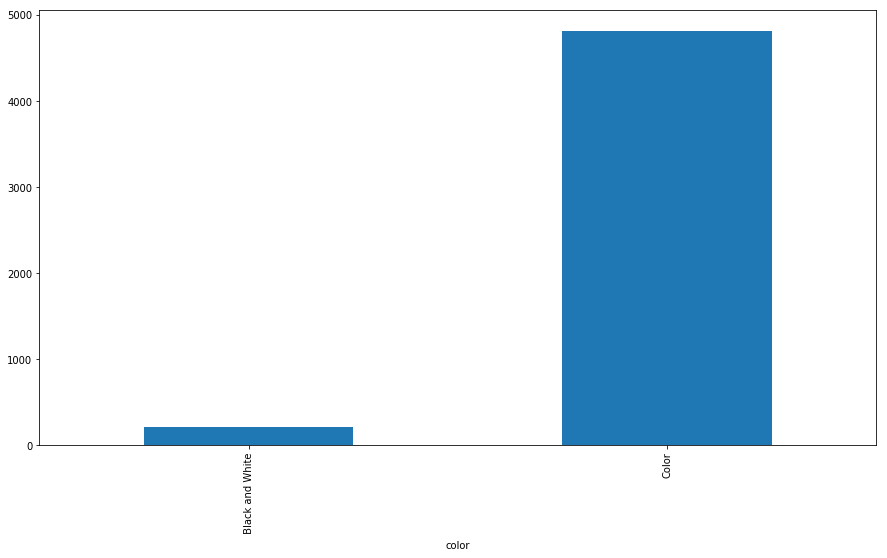

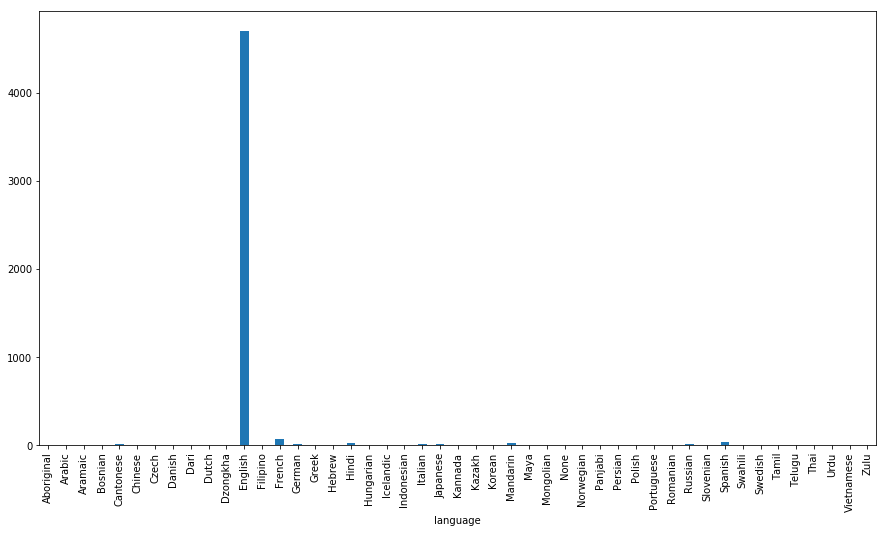

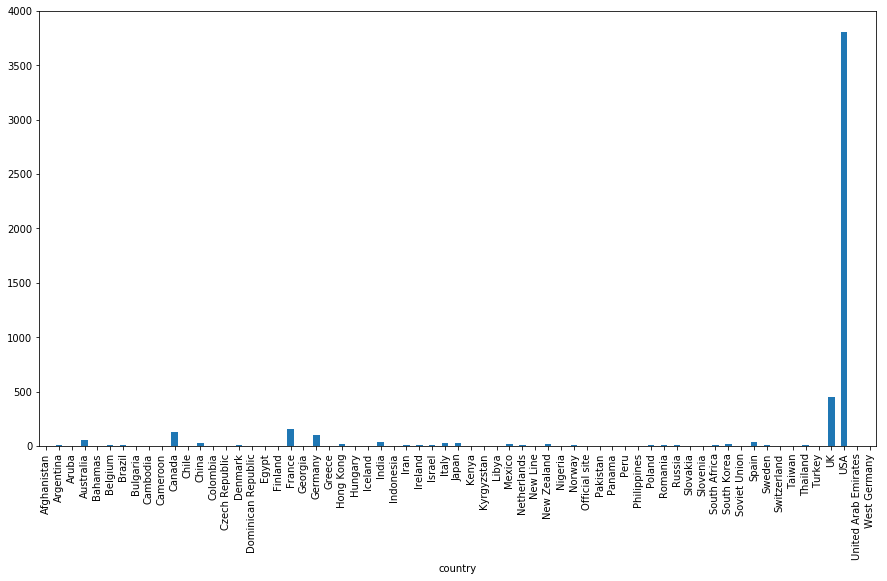

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

columns = ['color','language', 'country']
for column in columns:
    grouped = df.groupby(column)
    grouped_count = grouped[column].apply(lambda x: x.count())
    grouped_count.plot.bar(figsize=(15,8))
    plt.show()
    plt.close()

# Update genres in dataframe

In [4]:
import numpy as np

def split_func(s,delimiter):
    return s.spilt(delimeter)

def get_genres(df):
    genre_set = set()
    for index,row in df.iterrows():
        genre_set.update(row['genres'].split('|'))
    return genre_set
       
genre_set = get_genres(df)

for genre in genre_set:
    df[genre] = np.where(df['genres'].apply(lambda x: x.find(genre) > -1),1,0)
  

# Drop Unnessesary columns 

In [5]:
"""df = df.drop(columns=['color','director_name','director_facebook_likes','actor_3_facebook_likes',
                     'actor_2_name','actor_1_facebook_likes','actor_1_name',
                     'cast_total_facebook_likes','actor_3_name','facenumber_in_poster',
                     'plot_keywords','movie_imdb_link','aspect_ratio','movie_facebook_likes',
                     'language', 'country','actor_2_facebook_likes'],axis=1)"""

print (df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Adventure',
       'Western', 'Drama', 'Action', 'Sport', 'Music', 'Biography', 'Romance',
       'Reality-TV', 'Mystery', 'Horror', 'Fantasy', 'Musical', 'War',
       'Game-Show', 'Family', 'Crime', 'History', 'Sci-Fi', 'Documentary',
       'Comedy', 'Thriller', 'Animation', 'Short', 'Film-Noir', 'News'],
      dtype='object')


# Drop NA

In [6]:
df = df.dropna(subset=['budget','gross','duration','title_year'],axis=0)

# Update budget and gross according to inflation

In [7]:
inflation = pd.read_csv('inflation_data.csv')
inflation['CPI_Multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']

inflation['YEAR'] = inflation['DATE'].apply(lambda x: int(x[:4]))
df['YEAR'] = df['title_year'].apply(lambda x: int(x))

df = df.join(inflation.set_index('YEAR'), how='left', on='YEAR',lsuffix='_caller', rsuffix='_other')
df = df.drop(columns=['YEAR','DATE','CPIAUCNS'])

df['CPIAdjBudget'] = df['budget']*df['CPI_Multiplier']
df['CPIAdjGross'] = df['gross']*df['CPI_Multiplier']
df['log_CPIAdjBudget'] = np.log(df['CPIAdjBudget'])
df['log_CPIAdjGross'] = np.log(df['CPIAdjGross'])

df['log_CPIAdjProfit'] = df['log_CPIAdjGross']-df['log_CPIAdjBudget']
df['log_CPIAdjROI'] = (df['log_CPIAdjGross']-df['log_CPIAdjBudget'])/df['log_CPIAdjBudget']

df = df.drop(columns=['budget','gross','CPIAdjBudget','CPIAdjGross','CPI_Multiplier'])

C:\Users\noamarbe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:


print(df.head(5))

#3788 records

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes                           genres     actor_1_name  \
0                  1000.0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1                 

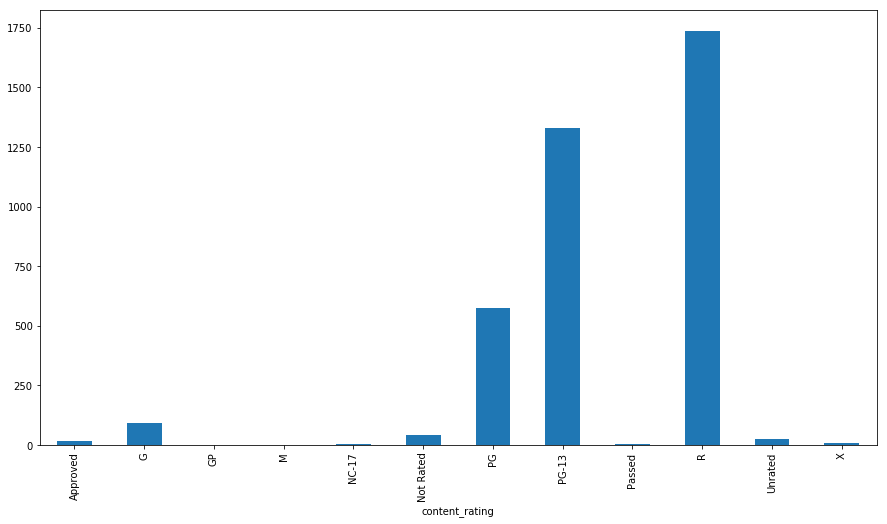

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby('content_rating')
grouped_count = grouped['content_rating'].apply(lambda x: x.count())
grouped_count.plot.bar(figsize=(15,8))
plt.show()
plt.close()

In [10]:
df['content_rating_R'] = np.where(df['content_rating'] == 'R',1,0)
df['content_rating_PG_13'] = np.where(df['content_rating'] == 'PG-13',1,0)
df['content_rating_PG'] = np.where(df['content_rating'] == 'PG',1,0)
df['content_rating_other'] = np.where((df['content_rating'] != 'PG')
                                   & (df['content_rating'] != 'PG-13')
                                   & (df['content_rating'] != 'R'),1,0)
df = df.drop(columns=['content_rating'],axis=1)
print(df.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes                           genres     actor_1_name  \
0                  1000.0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1                 

# SUTVA - dependency check for every year

# years: 75


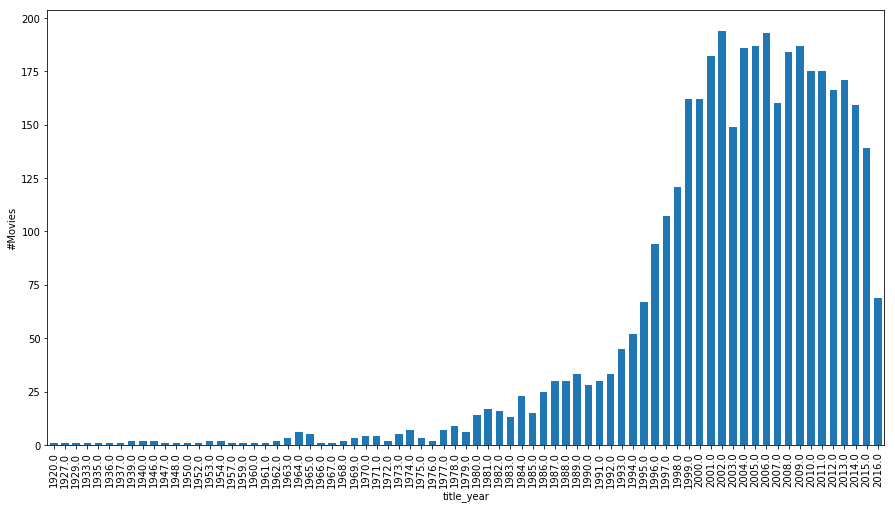

In [20]:
import matplotlib.pyplot as plt

grouped = df.groupby('title_year')
print('# years: ' + str(len(grouped)))
grouped_count = grouped['title_year'].apply(lambda x: x.count())
plt.ylabel('#Movies')
plt.xlabel('Year')
grouped_count.plot.bar(figsize=(15,8),width = 1/1.5)
plt.show()
plt.close()


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby('content_rating')
grouped_count = grouped['content_rating'].apply(lambda x: x.count())
grouped_count.plot.bar(figsize=(15,8))
plt.show()
plt.close()

KeyError: 'content_rating'

##### 